# Gaussian Process - the basics (george)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import george
from scipy.optimize import minimize

# plotting options
import seaborn as sns
sns.set(context='talk', style='white')
%config InlineBackend.figure_format = 'retina'

np.random.seed(32)

## Kernel functions

### Squared Exponential
  ## $$ K_{\mathrm{SE}}\left(d\right)=\sigma^2 \exp \left(-\frac{\left(d\right)^2}{2 \ell^2}\right) $$
  
### Matérn 3/2  
  ## $$ K_{3 / 2}(d)=\sigma^2\left(1+\frac{\sqrt{3} d}{\rho}\right) \exp \left(-\frac{\sqrt{3} d}{\rho}\right) $$
  
### Matérn 5/2
  ## $$ K_{5 / 2}(d)=\sigma^2\left(1+\frac{\sqrt{5} d}{\rho}+\frac{5 d^2}{3 \rho^2}\right) \exp \left(-\frac{\sqrt{5} d}{\rho}\right) $$

In [4]:
kernel1 = george.kernels.ExpSquaredKernel(100.0)
kernel2 = george.kernels.Matern32Kernel(100.0)
kernel3 = george.kernels.Matern52Kernel(100.0)

x = np.linspace(-10, 10, 500)

ES = kernel1.get_value(np.atleast_2d(x).T)
M32 = kernel2.get_value(np.atleast_2d(x).T)
M52 = kernel3.get_value(np.atleast_2d(x).T)

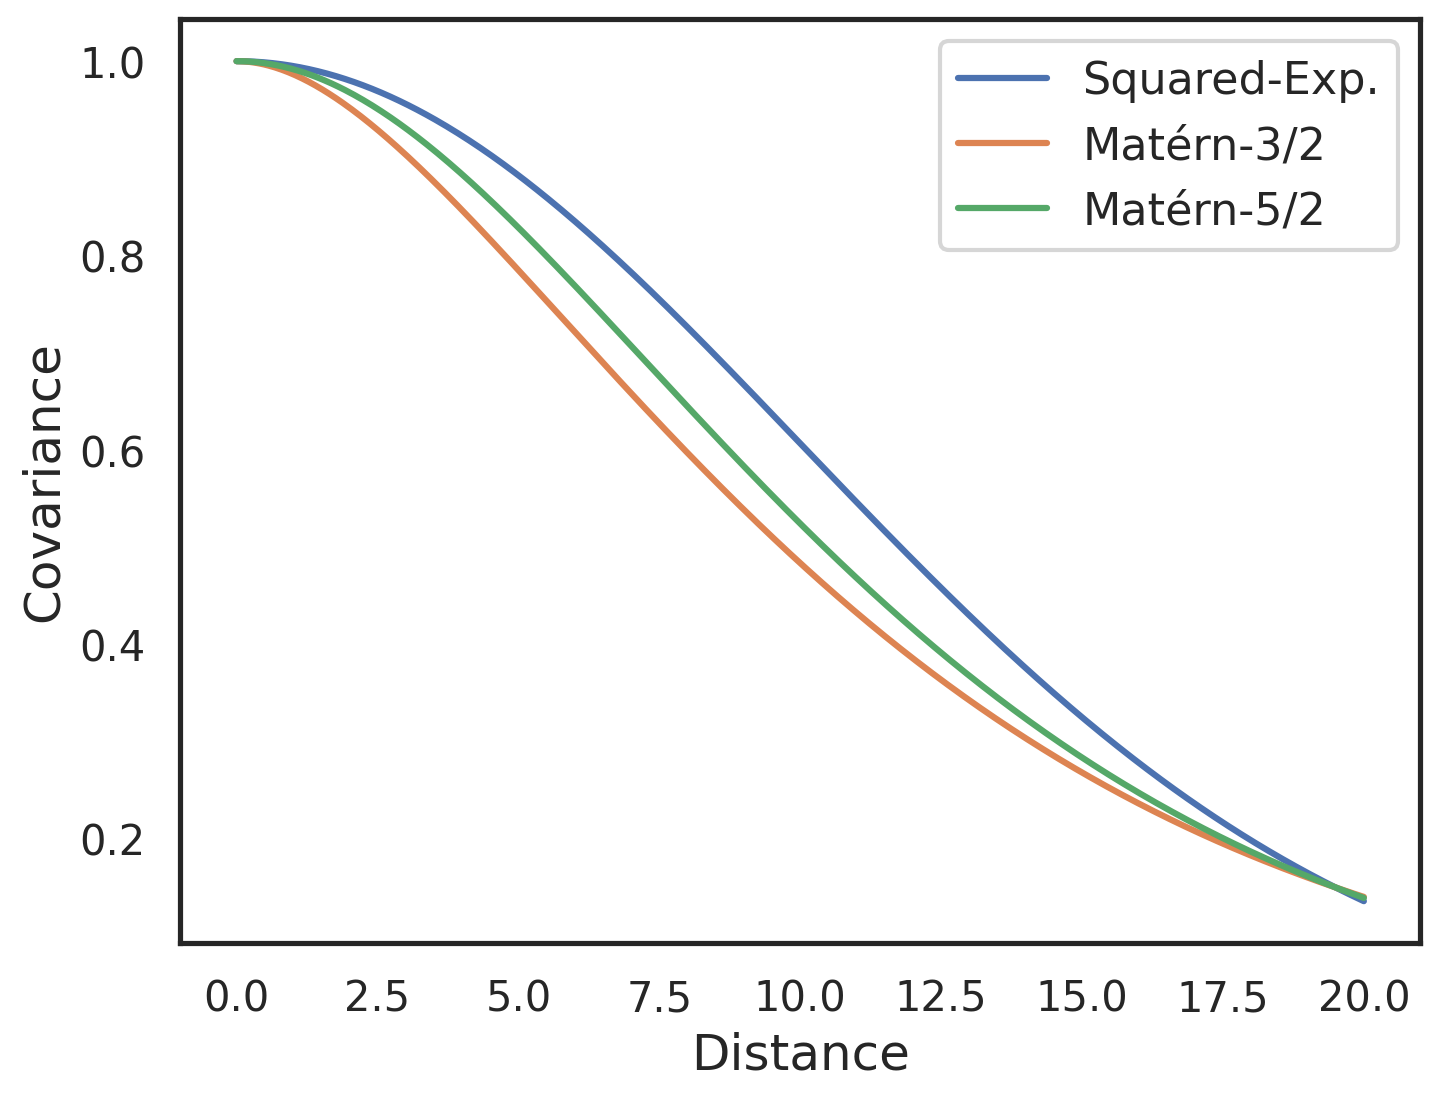

In [5]:
fontsize = 18
f, ax = plt.subplots(figsize=(8,6))

idx = 0
ax.plot(x-x[idx], ES[idx], label='Squared-Exp.')
ax.plot(x-x[idx], M32[idx], label = 'Matérn-3/2')
ax.plot(x-x[idx], M52[idx], label = 'Matérn-5/2')

ax.set_xlabel('Distance', fontsize=fontsize)
ax.set_ylabel('Covariance', fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.legend(fontsize=16)
plt.show()

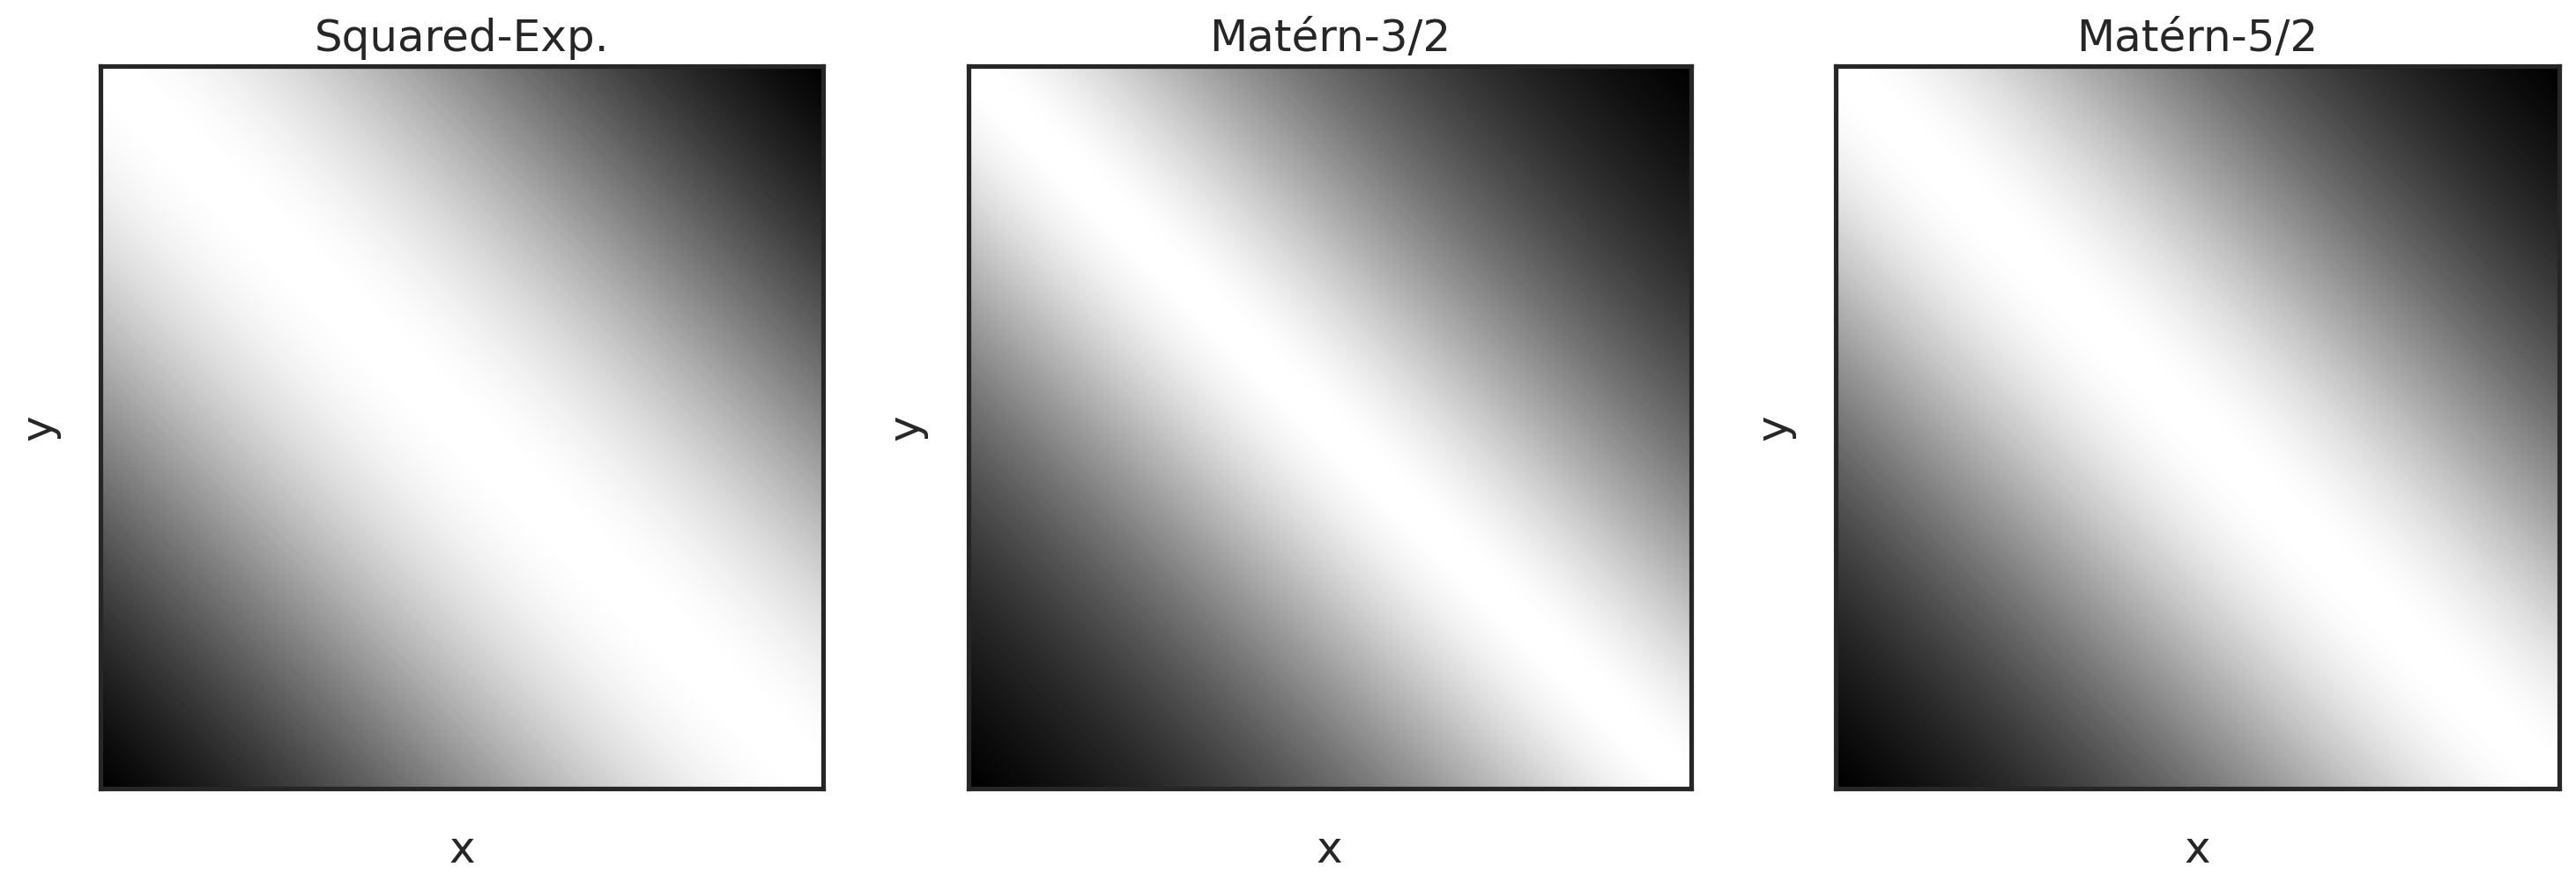

In [26]:
titles = ['Squared-Exp.','Matérn-3/2', 'Matérn-5/2']
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, kernel in enumerate([ES, M32, M52]):
    ax[i].imshow(kernel, cmap="gray", interpolation="nearest")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_title(titles[i])

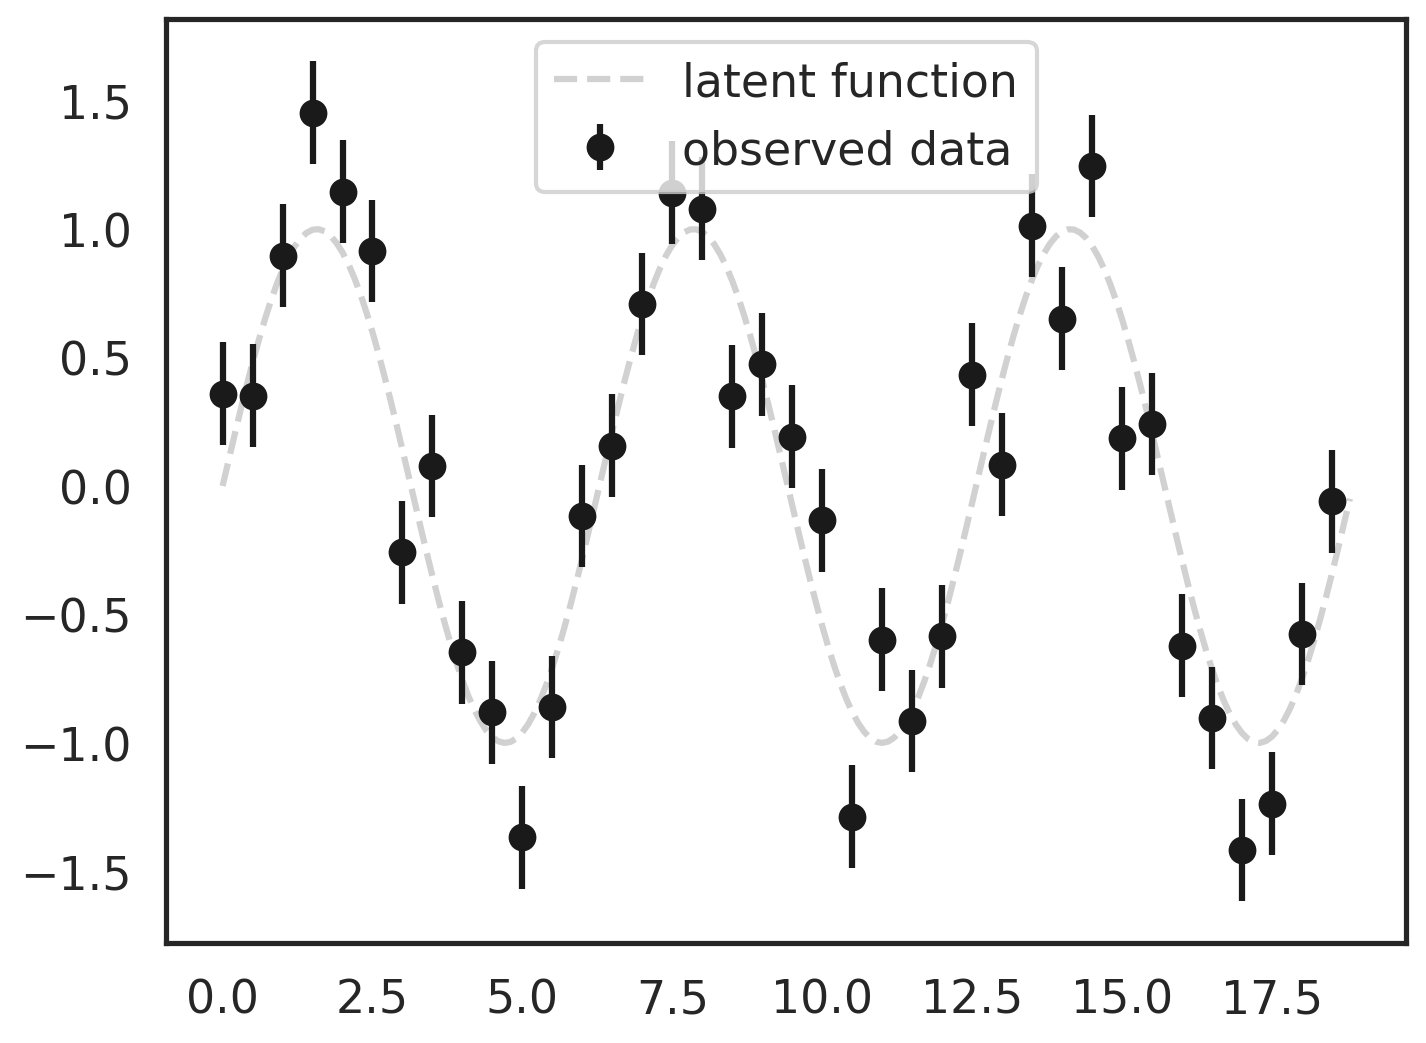

In [6]:
# set up data
x_true = np.arange(0, 6*np.pi, 0.1)
y_true = np.sin(x_true)

x = np.arange(0, 6*np.pi, 0.5)
y = np.sin(x) + np.random.rand(len(x))-0.5
yerr = 0.2

fontsize = 18
f, ax = plt.subplots(figsize=(8,6))

ax.plot(x_true, y_true, '--k', alpha=0.2, label='latent function')
ax.errorbar(x, y, yerr, fmt='ko', label='observed data')
plt.legend()
plt.show()

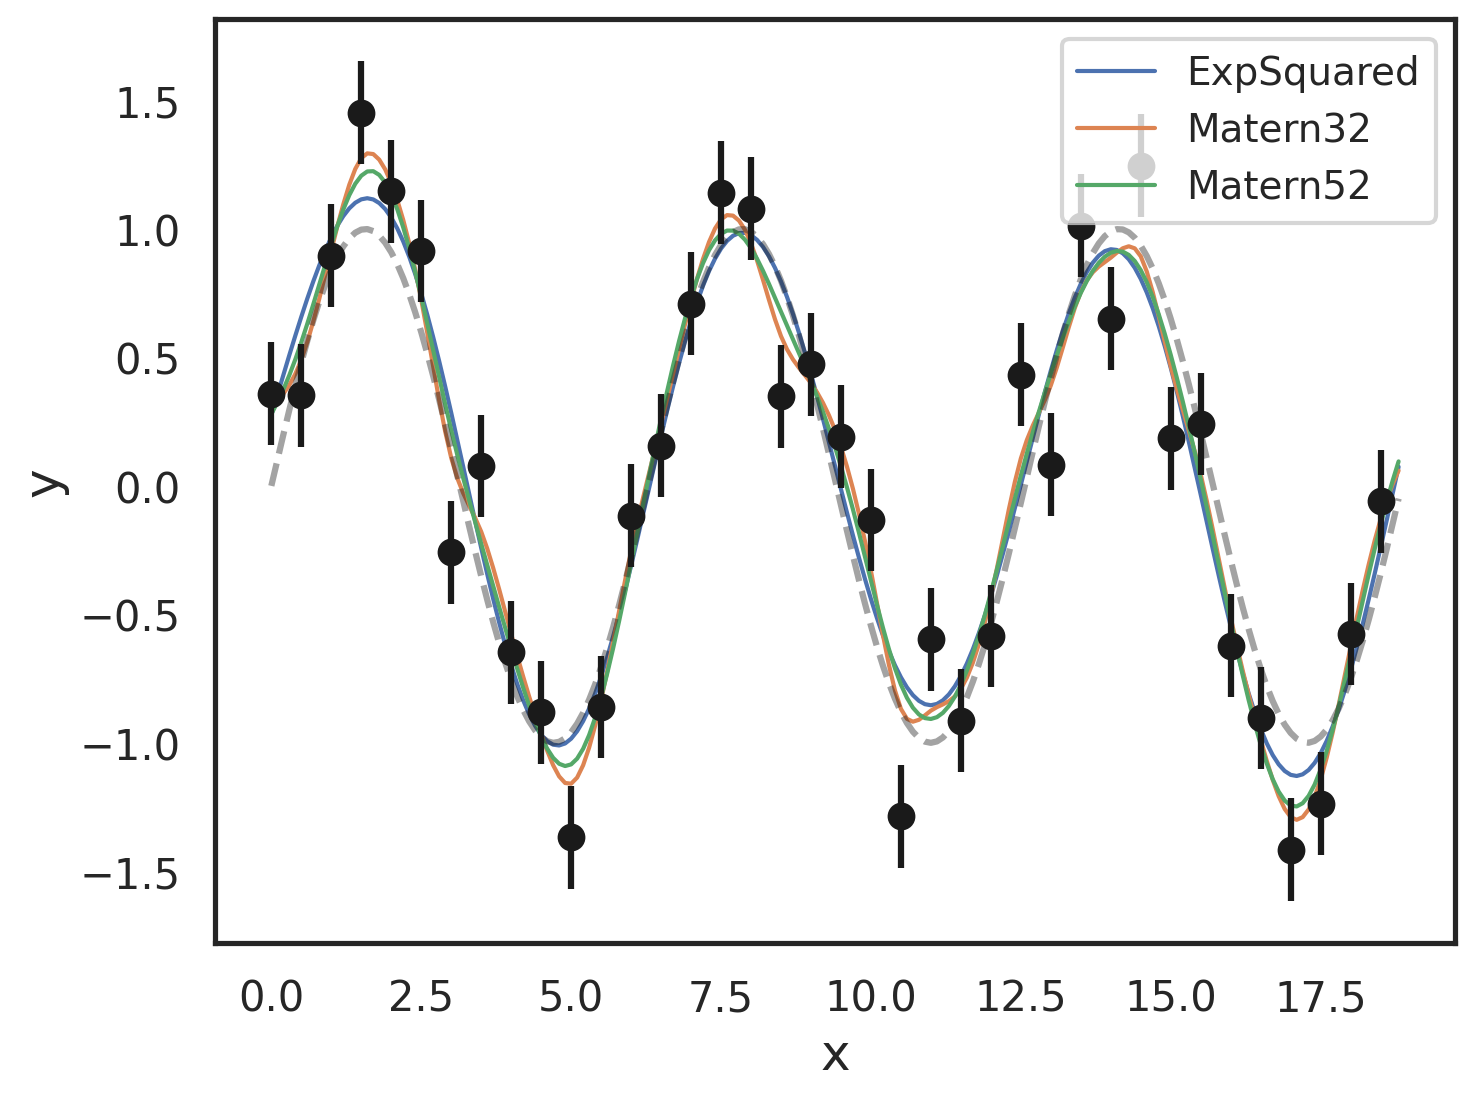

In [9]:
kernel_name = ['ExpSquared', 'Matern32', 'Matern52']
kernel1 = 1.0*george.kernels.ExpSquaredKernel(5.0)
kernel2 = 1.0*george.kernels.Matern32Kernel(5.0)
kernel3 = 1.0*george.kernels.Matern52Kernel(5.0)
kernels = [kernel1, kernel2, kernel3]

# set up data
x_true = np.arange(0, 6*np.pi, 0.1)
y_true = np.sin(x_true)

# sample
x = np.arange(0, 6*np.pi, 0.5)
y = np.sin(x) + np.random.rand(len(x))-0.5
yerr = 0.2

x_pred = np.copy(x_true)

fontsize = 18
f, ax = plt.subplots(figsize=(8,6))

for name, k in zip(kernel_name, kernels):

    gp = george.GP(k)
    gp.compute(x, yerr)
    y_pred, pred_var = gp.predict(y, x_pred, return_var=True)
    
    ax.plot(x_pred, y_pred, lw=1.5, label=f'{name}')
    
ax.plot(x_true, y_true, '--k', alpha=0.4)
ax.errorbar(x, y, yerr=yerr, fmt="ok")

ax.set_xlabel("x", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.legend(fontsize=14)
plt.show()

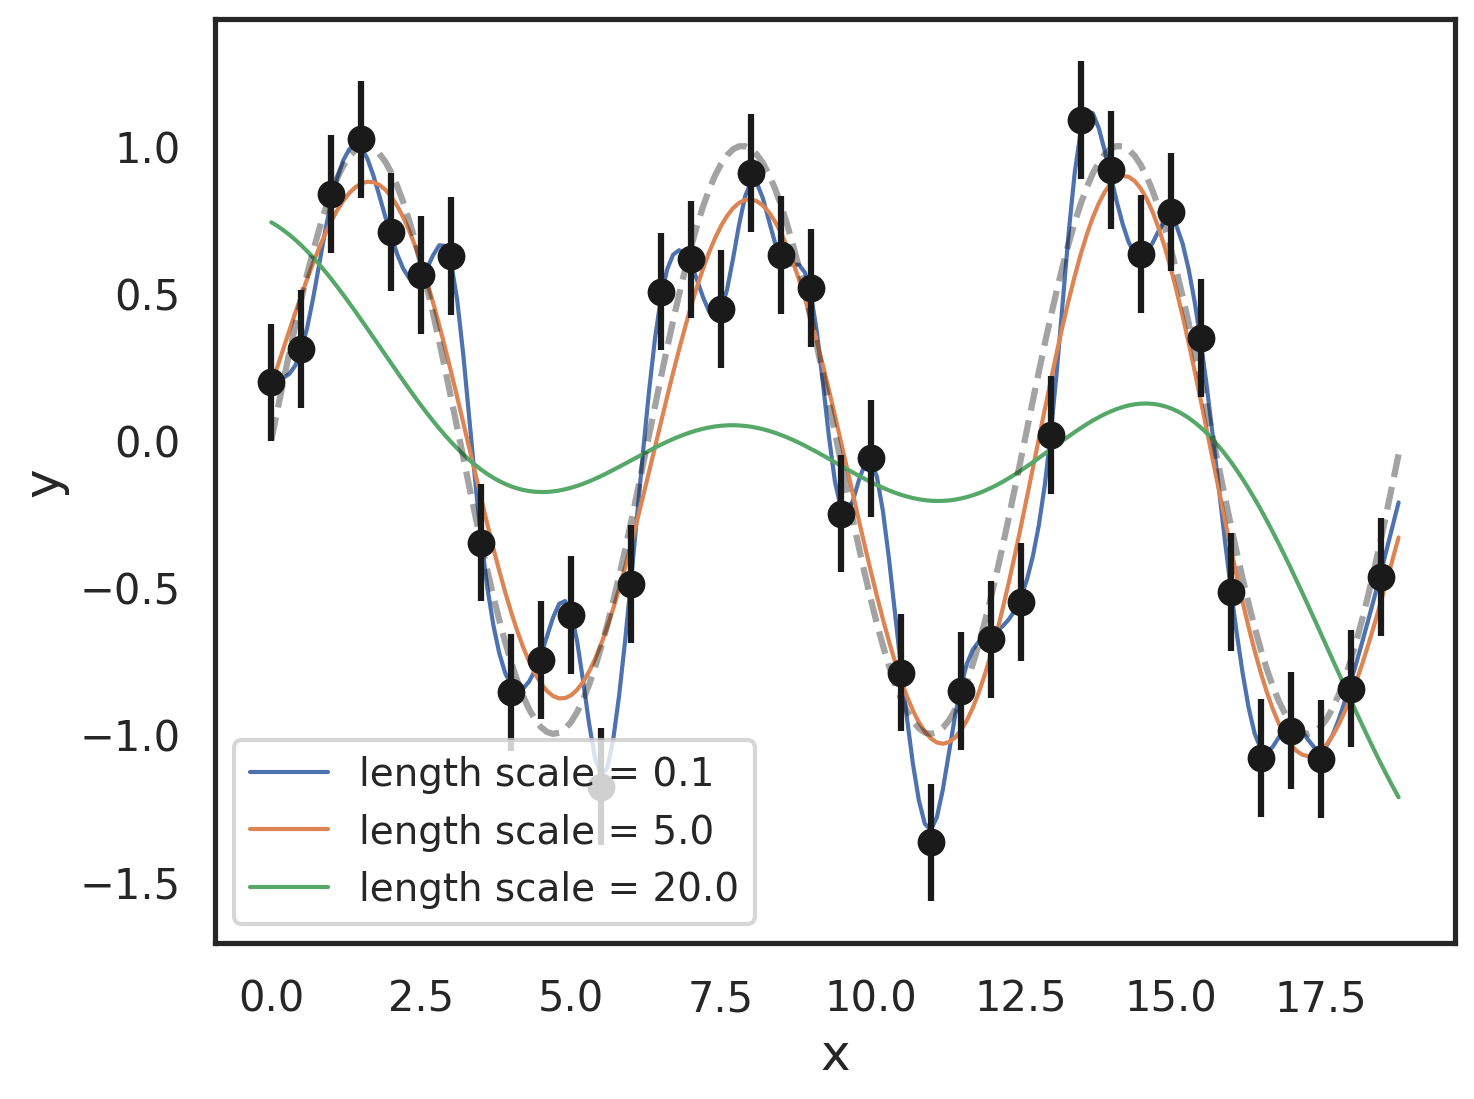

In [10]:
lengths = [0.1, 5.0, 20.0]
kernel1 = 1.0*george.kernels.ExpSquaredKernel(lengths[0])
kernel2 = 1.0*george.kernels.ExpSquaredKernel(lengths[1])
kernel3 = 1.0*george.kernels.ExpSquaredKernel(lengths[2])
kernels = [kernel1, kernel2, kernel3]

# set up data
x_true = np.arange(0, 6*np.pi, 0.1)
y_true = np.sin(x_true)

# sample
x = np.arange(0, 6*np.pi, 0.5)
y = np.sin(x) + np.random.rand(len(x))-0.5
yerr = 0.2

x_pred = np.copy(x_true)

fontsize = 18
f, ax = plt.subplots(figsize=(8,6))

for l, k in zip(lengths, kernels):

    gp = george.GP(k)
    gp.compute(x, yerr)
    y_pred, pred_var = gp.predict(y, x_pred, return_var=True)
    
    ax.plot(x_pred, y_pred, lw=1.5, label=f'length scale = {l}')
    
ax.plot(x_true, y_true, '--k', alpha=0.4)
ax.errorbar(x, y, yerr=yerr, fmt="ok")

ax.set_xlabel("x", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.legend(fontsize=14)
plt.show()

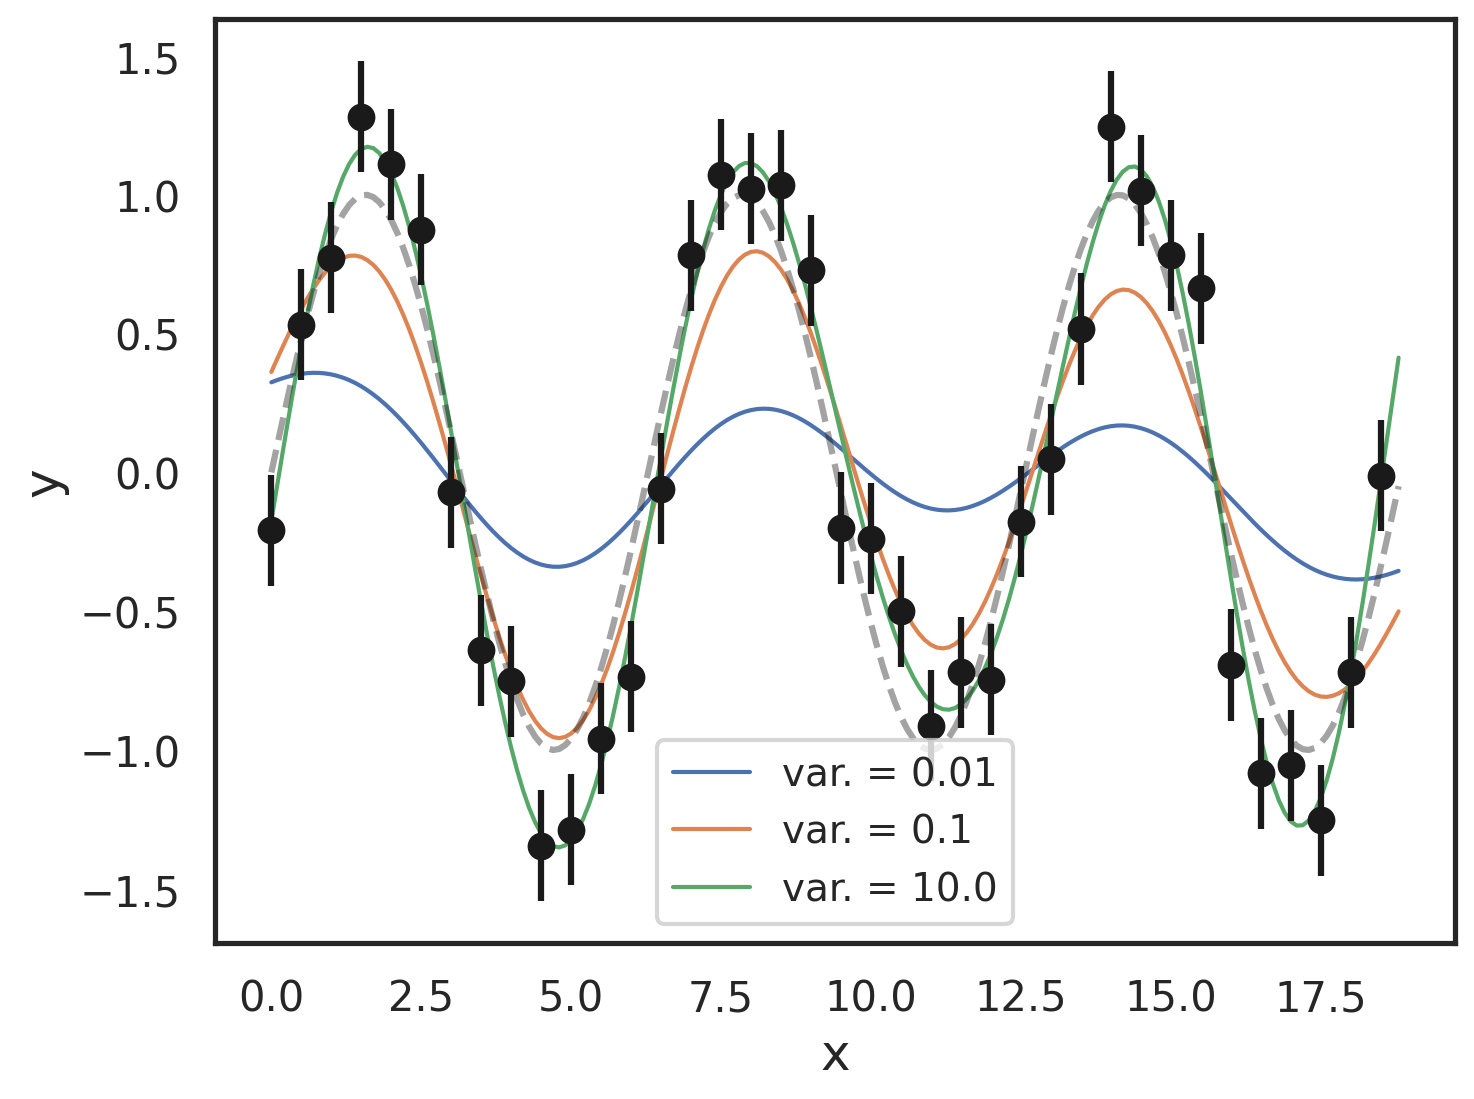

In [11]:
sig_sq = [.01, .1, 10.0]
kernel1 = sig_sq[0]*george.kernels.ExpSquaredKernel(5.0)
kernel2 = sig_sq[1]*george.kernels.ExpSquaredKernel(5.0)
kernel3 = sig_sq[2]*george.kernels.ExpSquaredKernel(5.0)
kernels = [kernel1, kernel2, kernel3]

# set up data
x_true = np.arange(0, 6*np.pi, 0.1)
y_true = np.sin(x_true)

# sample
x = np.arange(0, 6*np.pi, 0.5)
y = np.sin(x) + np.random.rand(len(x))-0.5
yerr = 0.2

x_pred = np.copy(x_true)

fontsize = 18
f, ax = plt.subplots(figsize=(8,6))

for s, k in zip(sig_sq, kernels):

    gp = george.GP(k)
    gp.compute(x, yerr)
    y_pred, pred_var = gp.predict(y, x_pred, return_var=True)

    #lt.fill_between(x_pred, y_pred - np.sqrt(pred_var), y_pred + np.sqrt(pred_var), 
    #                alpha=0.4)
    plt.plot(x_pred, y_pred, lw=1.5, label=f'var. = {s}')

ax.plot(x_true, y_true, '--k', alpha=0.4)
ax.errorbar(x, y, yerr=yerr, fmt="ok")

ax.set_xlabel("x", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.legend(fontsize=14)
plt.show()